In [1]:
# Library import
import pandas as pd # for data manipulation and analysis
import numpy as np # for scientific computing with Python
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline
import seaborn as sns # for advanced visualization
import os

In [2]:
df= pd.read_csv('../Data/Raw/Nepali_dataset.csv')

In [3]:
df_copy= df.copy()
df_copy.head()

,Text,Aspect Term,Sentiment,Polarity
0,गुठी विधेक ल्याएर ठमेल मा राज गुठि को जग्गा मा...,जोगाउन को लागि,GENERAL,0
1,दले ले देश सकेछन सबै बेचे र खान सुरू गरेछन अब ...,लखेटनु पछ,GENERAL,1
2,नेपाल को ससकृती ध्वस्त पार्ने योजना हो यो !,ससकृती ध्वस्त पार्ने,GENERAL,1
3,मठ मन्दिर गुम्बा का जग्गा हरु मा भुमाफिया को न...,भुमाफिया,GENERAL,1
4,नेपाल का कल कर्खाना र नदि नाला बेची सके अब मठ ...,बेची सके,GENERAL,1


In [4]:
# Import embedding Models
from gensim.models import Word2Vec, FastText, KeyedVectors

In [5]:
# Output path
output_path = "../Data/Embeddings/"

# FastText


In [35]:
def create_fasttext_embeddings(texts, output_file):
    sentences = [text.split() for text in texts]  # Tokenize each text into words
    fasttext_model = FastText(sentences, vector_size=100, window=5, min_count=1, workers=4)  # Train FastText model
    fasttext_model.save(output_file)  # Save the entire FastText model

# Specify the output file path
fasttext_output_file = os.path.join(output_path, 'fasttext_embeddings.model')

# Example call
create_fasttext_embeddings(df_copy['Text'], fasttext_output_file)

2024-12-19 20:12:08,279 | INFO | gensim.models.word2vec | collecting all words and their counts
2024-12-19 20:12:08,280 | INFO | gensim.models.word2vec | PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2024-12-19 20:12:08,312 | INFO | gensim.models.word2vec | collected 9517 word types from a corpus of 72367 raw words and 4035 sentences
2024-12-19 20:12:08,314 | INFO | gensim.models.word2vec | Creating a fresh vocabulary
2024-12-19 20:12:08,347 | INFO | gensim.utils | FastText lifecycle event {'msg': 'effective_min_count=1 retains 9517 unique words (100.00% of original 9517, drops 0)', 'datetime': '2024-12-19T20:12:08.347765', 'gensim': '4.3.3', 'python': '3.11.4 (main, Dec  7 2023, 15:43:41) [GCC 12.3.0]', 'platform': 'Linux-6.2.0-39-generic-x86_64-with-glibc2.37', 'event': 'prepare_vocab'}
2024-12-19 20:12:08,348 | INFO | gensim.utils | FastText lifecycle event {'msg': 'effective_min_count=1 leaves 72367 word corpus (100.00% of original 72367, drops 0)', 'datetime': 

# Word2Vec


In [11]:
def create_word2vec_embeddings(texts, output_file):
    sentences = [text.split() for text in texts]
    word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
    word2vec_model.save(output_file)

word2vec_output_file = os.path.join(output_path, 'word2vec_embeddings.txt')
create_word2vec_embeddings(df_copy['Text'], word2vec_output_file)

# Load the model
model = Word2Vec.load('../Data/Embeddings/word2vec_embeddings.txt')

# Open the output file in write mode
output_file_path = '../Data/Embeddings/word2vec_embeddings.txt'
with open(output_file_path, 'w', encoding='utf-8') as f:
    # Writing metadata line
    f.write(f"9517 100\n")
    
    for word in model.wv.index_to_key:
        vector = model.wv[word]
        vector_str = ' '.join(f'{value:.6f}' for value in vector)
        f.write(f"{word} {vector_str}\n")




# Glove

In [56]:
def create_glove_embeddings(texts, output_file, dim=100, window=5, epochs=15):
    sentences = [text.split() for text in texts]
    glove_model = Word2Vec(
        sentences=sentences,
        vector_size=dim,
        window=window,
        min_count=1,
        sg=0,                # CBOW as in GloVe
        workers=4,
        epochs=epochs
    )
    glove_model.wv.save_word2vec_format(output_file, binary=False)

glove_output_file = os.path.join(output_path, 'glove_embeddings.txt')
create_glove_embeddings(df_copy['Text'], glove_output_file)

2024-12-20 06:15:49,741 | INFO | gensim.models.word2vec | collecting all words and their counts
2024-12-20 06:15:49,744 | INFO | gensim.models.word2vec | PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2024-12-20 06:15:49,764 | INFO | gensim.models.word2vec | collected 9517 word types from a corpus of 72367 raw words and 4035 sentences
2024-12-20 06:15:49,767 | INFO | gensim.models.word2vec | Creating a fresh vocabulary
2024-12-20 06:15:49,850 | INFO | gensim.utils | Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 9517 unique words (100.00% of original 9517, drops 0)', 'datetime': '2024-12-20T06:15:49.847600', 'gensim': '4.3.3', 'python': '3.11.4 (main, Dec  7 2023, 15:43:41) [GCC 12.3.0]', 'platform': 'Linux-6.2.0-39-generic-x86_64-with-glibc2.37', 'event': 'prepare_vocab'}
2024-12-20 06:15:49,851 | INFO | gensim.utils | Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 72367 word corpus (100.00% of original 72367, drops 0)', 'datetime': 

In [41]:
# Load GloVe embeddings
embeddings_dict = {}
with open("../Data/Preprocessed/glove_embeddings.txt", 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

for word in list(embeddings_dict.keys())[:10]:  # Check the first 10 words
    vector = embeddings_dict[word]
    print(f"{word}: vector length = {len(vector)}")


9517: vector length = 1
को: vector length = 100
।: vector length = 100
लाई: vector length = 100
ले: vector length = 100
मा: vector length = 100
,: vector length = 100
यो: vector length = 100
हरु: vector length = 100
छ: vector length = 100


/home/angel-tamang/myenv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Lohit Devanagari.
  fig.canvas.print_figure(bytes_io, **kw)
/home/angel-tamang/myenv/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9994 (\N{RAISED FIST}) missing from font(s) Lohit Devanagari.
  fig.canvas.print_figure(bytes_io, **kw)


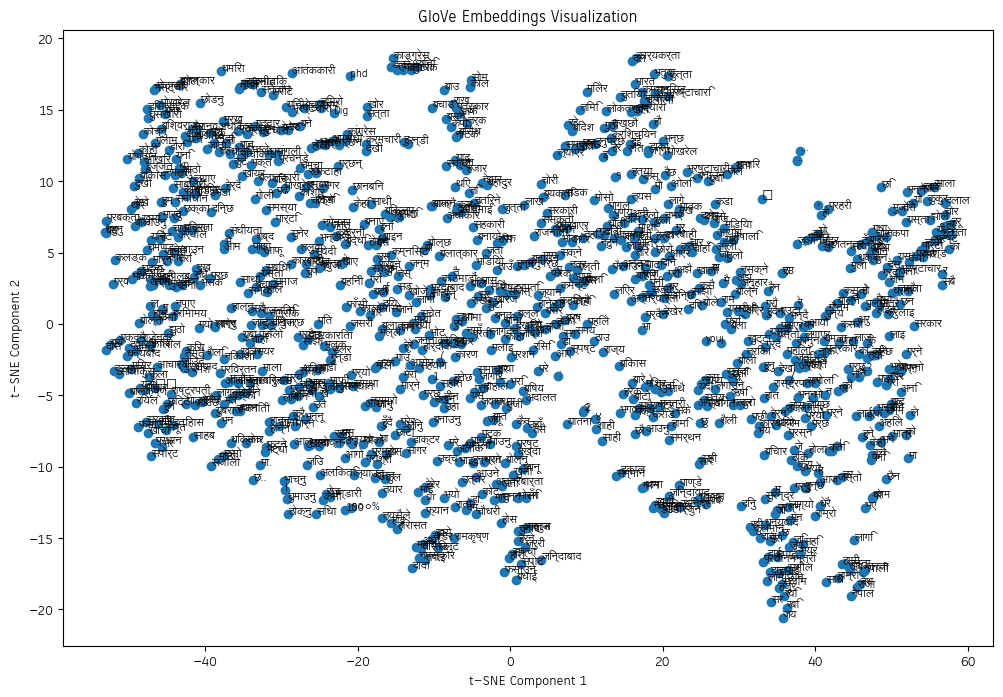

In [53]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
from matplotlib.widgets import RectangleSelector
import matplotlib

# Set the font to use Lohit Devanagari
matplotlib.rcParams['font.family'] = 'Lohit Devanagari'
matplotlib.rcParams['text.usetex'] = False  # Disable TeX rendering

# Load GloVe embeddings
embeddings_dict = {}
with open("../Data/Preprocessed/glove_embeddings.txt", 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

# Prepare t-SNE
tsne = TSNE(n_components=2, random_state=0)

# Sample words for visualization (e.g., top 1000 based on frequency)
words = list(embeddings_dict.keys())
vectors = np.array([embeddings_dict[word] for word in words])  # Convert to 2D array

# Fit t-SNE
Y = tsne.fit_transform(vectors[:1000])  # Reduce the dimensionality of the top 1000 words

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
sc = ax.scatter(Y[:, 0], Y[:, 1])

# Annotate points
for label, x, y in zip(words[:1000], Y[:, 0], Y[:, 1]):
    ax.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points", fontsize=8)

plt.title('GloVe Embeddings Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

# Zoom functionality
def on_select(eclick, erelease):
    x0, x1 = sorted([eclick.xdata, erelease.xdata])
    y0, y1 = sorted([eclick.ydata, erelease.ydata])
    
    ax.set_xlim(x0, x1)
    ax.set_ylim(y0, y1)
    
    # Clear previous points and annotations
    ax.clear()
    sc = ax.scatter(Y[:, 0], Y[:, 1])
    
    # Add annotations again
    for label, x, y in zip(words[:1000], Y[:, 0], Y[:, 1]):
        ax.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points", fontsize=8)

    plt.draw()


# RectangleSelector
rect_selector = RectangleSelector(ax, on_select, 
                                   button=[1],  # Left mouse button
                                   interactive=True)

plt.show()


- We did create .txt file, to use the saved model use keyedVectors methods to import the models for efficiency
- eg:
- glove_model = KeyedVectors.load_word2vec_format('../Data/Preprocessed/glove_embeddings.txt', binary=False

In [36]:
# eg for each model

# Load FastText model
fasttext_model = FastText.load("../Data/Preprocessed/fasttext_embeddings.model")

# Access word vectors
vector = fasttext_model.wv['देश']  
print(vector)

2024-12-19 20:12:52,346 | INFO | gensim.utils | loading FastText object from ../Data/Preprocessed/fasttext_embeddings.model
2024-12-19 20:12:52,370 | INFO | gensim.utils | loading wv recursively from ../Data/Preprocessed/fasttext_embeddings.model.wv.* with mmap=None
2024-12-19 20:12:52,371 | INFO | gensim.utils | loading vectors_ngrams from ../Data/Preprocessed/fasttext_embeddings.model.wv.vectors_ngrams.npy with mmap=None
2024-12-19 20:12:56,524 | INFO | gensim.utils | setting ignored attribute buckets_word to None
2024-12-19 20:12:56,530 | INFO | gensim.utils | setting ignored attribute vectors to None
2024-12-19 20:12:56,874 | INFO | gensim.utils | setting ignored attribute cum_table to None
2024-12-19 20:12:56,952 | INFO | gensim.utils | FastText lifecycle event {'fname': '../Data/Preprocessed/fasttext_embeddings.model', 'datetime': '2024-12-19T20:12:56.952139', 'gensim': '4.3.3', 'python': '3.11.4 (main, Dec  7 2023, 15:43:41) [GCC 12.3.0]', 'platform': 'Linux-6.2.0-39-generic-x86

In [37]:

# Load the Word2Vec model
word2vec_model = Word2Vec.load("../Data/Preprocessed/word2vec_embeddings.txt")

sample_word = 'को'  
vector = word2vec_model.wv[sample_word]

print(f"Vector for {sample_word}: {vector}")


2024-12-19 20:19:13,346 | INFO | gensim.utils | loading Word2Vec object from ../Data/Preprocessed/word2vec_embeddings.txt
2024-12-19 20:19:13,415 | INFO | gensim.utils | loading wv recursively from ../Data/Preprocessed/word2vec_embeddings.txt.wv.* with mmap=None
2024-12-19 20:19:13,416 | INFO | gensim.utils | setting ignored attribute cum_table to None
2024-12-19 20:19:13,490 | INFO | gensim.utils | Word2Vec lifecycle event {'fname': '../Data/Preprocessed/word2vec_embeddings.txt', 'datetime': '2024-12-19T20:19:13.490746', 'gensim': '4.3.3', 'python': '3.11.4 (main, Dec  7 2023, 15:43:41) [GCC 12.3.0]', 'platform': 'Linux-6.2.0-39-generic-x86_64-with-glibc2.37', 'event': 'loaded'}
Vector for को: [-6.10913217e-01  8.94695222e-01  9.16843593e-01  7.21895278e-01
 -1.60915218e-02 -1.30920875e+00  4.38319921e-01  2.59713793e+00
 -1.39490247e+00 -1.11303031e+00 -3.92438650e-01 -1.60793173e+00
  1.81878477e-01  6.62396073e-01  2.68260986e-01 -1.42263126e+00
  6.25417590e-01 -9.80028450e-01  8.

In [59]:

# Load GloVe model
glove_model = KeyedVectors.load_word2vec_format("../Data/Preprocessed/glove_embeddings.txt", binary=False)

# Access word vectors
vector = glove_model['देश']
print(vector)


2024-12-20 06:24:17,597 | INFO | gensim.models.keyedvectors | loading projection weights from ../Data/Preprocessed/glove_embeddings.txt
2024-12-20 06:24:18,290 | INFO | gensim.utils | KeyedVectors lifecycle event {'msg': 'loaded (9517, 100) matrix of type float32 from ../Data/Preprocessed/glove_embeddings.txt', 'binary': False, 'encoding': 'utf8', 'datetime': '2024-12-20T06:24:18.290265', 'gensim': '4.3.3', 'python': '3.11.4 (main, Dec  7 2023, 15:43:41) [GCC 12.3.0]', 'platform': 'Linux-6.2.0-39-generic-x86_64-with-glibc2.37', 'event': 'load_word2vec_format'}
[-0.48766991  0.9723677   0.8148408   0.13571821 -0.0417061  -0.27670676
  0.20385697  1.8411604   0.03486707 -0.5157216  -0.28037834 -0.88197523
  0.04745149  0.15732025 -0.63585633 -1.2556411   0.24903165 -0.57143056
  0.2891682  -1.3405461   0.43809885  0.4498337   0.5898006   0.23466155
 -0.6570527   0.09988759  0.6656425   0.30757132 -0.8546909  -0.5629674
  0.33986384 -0.77456397 -0.156657   -1.1198577  -0.35245883 -0.33446

In [62]:
words= df["Text"].loc[0].split()

In [66]:
word_vectors=[glove_model[words]]
print(word_vectors)

[array([[-0.2505824 ,  0.18538585,  0.3547338 , ..., -0.2772198 ,
         0.01105034, -0.10770611],
       [-0.09928526,  0.09167412,  0.11909453, ..., -0.10668852,
         0.02735105, -0.00528737],
       [-0.22634785,  0.33923748,  0.3293186 , ..., -0.21763001,
         0.06568737,  0.01443712],
       ...,
       [-0.01388085,  0.03777543,  0.03188535, ..., -0.02150066,
         0.00521871,  0.00418475],
       [-0.09928526,  0.09167412,  0.11909453, ..., -0.10668852,
         0.02735105, -0.00528737],
       [-0.17676644,  0.5874823 ,  0.5746554 , ..., -0.6979505 ,
         0.34504437, -0.03337139]], dtype=float32)]


## load the models in similar fashion while model training
